In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [7]:
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
Data = pd.read_csv("Final_News_DF_Labeled_ExamDataset.csv")
Y = np.array(Data.LABEL)
X = Data.drop("LABEL", axis=1)
vocabulary = list(X.columns)

## DATA PREPARATION

In [4]:
### SPLIT
# Split TRAINING & TESTING data
X_training, x_test, Y_training, labels_test = train_test_split(X, Y, test_size=0.2, random_state=69, stratify=Y) 

# Further split training data into train & validation datasets
x_train, x_valid, labels_train, labels_valid = train_test_split(X_training, Y_training, test_size=0.3, random_state=69, stratify=Y_training)

### NORMALIZE 
# Normalize DTM to account for longer pieces of text
# Scaling
scaler = MinMaxScaler()
scaler.fit(x_train) # Fit on training data

# Transform the data
x_train = scaler.transform(x_train)
X_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

### ECODE LABELS
# One-Hot-Encode categorical, text labels
lab_encoder = OneHotEncoder(sparse_output=False) # Initialize
lab_encoder.fit(labels_train.reshape(-1,1)) # Fit to training labels

# Encode All labels
y_train = lab_encoder.transform(labels_train.reshape(-1,1))
y_valid = lab_encoder.transform(labels_valid.reshape(-1,1))
y_test = lab_encoder.transform(labels_test.reshape(-1,1))

# Print Result Stats
print("Training Data shape = ", x_train.shape)
print("Training Labels shape = ", y_train.shape)

print("Validation Data shape = ", x_valid.shape)
print("Validation Labels shape = ", y_valid.shape)

print("Test Data shape = ", x_test.shape)
print("Test Labels shape = ", y_test.shape)

print("\n\nTraining Data Sample:\n",x_train[6])
print("\n\nTraining Label Sample:\n",y_train[6])
print(labels_train[6])

Training Data shape =  (835, 300)
Training Labels shape =  (835, 3)
Validation Data shape =  (359, 300)
Validation Labels shape =  (359, 3)
Test Data shape =  (299, 300)
Test Labels shape =  (299, 3)


Training Data Sample:
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

# Model 1: ANN

In [65]:
### Artificial Neural Network

input_shape = (300,)
ANN_Model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=input_shape, activation= 'relu'),
    tf.keras.layers.Dropout(0.3), # Randomly turns 30% of input units to 0 (prevents overfitting)
    tf.keras.layers.Dense(10, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation= 'softmax'),
    ])

ANN_Model.summary()


ANN_Model.compile(
    loss = "categorical_crossentropy", # Labels are OneHotEncoded
    metrics=["accuracy"],
    optimizer='adam'
    )


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 30)                9030      
                                                                 
 dropout_41 (Dropout)        (None, 30)                0         
                                                                 
 dense_54 (Dense)            (None, 10)                310       
                                                                 
 dropout_42 (Dropout)        (None, 10)                0         
                                                                 
 dense_55 (Dense)            (None, 3)                 33        
                                                                 
Total params: 9,373
Trainable params: 9,373
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
6/6 [==============================] - 0s 13ms/step - loss: 1.0979 - accuracy: 0.3329 - val_loss: 1.0920 - val_accuracy: 0.3621
Epoch 2/30
6/6 [==============================] - 0s 3ms/step - loss: 1.0891 - accuracy: 0.3533 - val_loss: 1.0781 - val_accuracy: 0.3983
Epoch 3/30
6/6 [==============================] - 0s 3ms/step - loss: 1.0721 - accuracy: 0.4096 - val_loss: 1.0625 - val_accuracy: 0.4652
Epoch 4/30
6/6 [==============================] - 0s 3ms/step - loss: 1.0622 - accuracy: 0.4395 - val_loss: 1.0460 - val_accuracy: 0.4958
Epoch 5/30
6/6 [==============================] - 0s 3ms/step - loss: 1.0504 - accuracy: 0.4635 - val_loss: 1.0275 - val_accuracy: 0.5237
Epoch 6/30
6/6 [==============================] - 0s 3ms/step - loss: 1.0341 - accuracy: 0.5138 - val_loss: 1.0083 - val_accuracy: 0.5710
Epoch 7/30
6/6 [==============================] - 0s 3ms/step - loss: 1.0188 - accuracy: 0.5329 - val_loss: 0.9879 - val_accuracy: 0.5989
Epoch 8/30
6/6 [=================

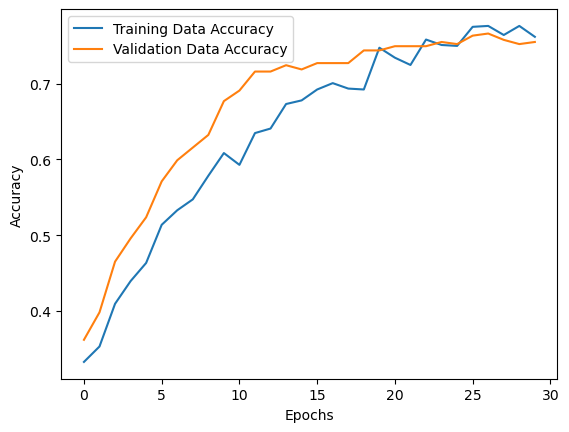

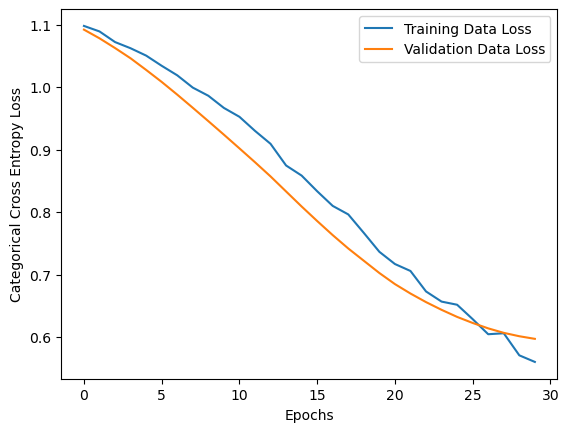

In [66]:
### TRAINING
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=10, verbose=1, mode='max', restore_best_weights=True)

## FIT THE MODEL
model_train = ANN_Model.fit(x_train, y_train,
                        epochs = 30,
                        batch_size = 150,
                        validation_data = (x_valid, y_valid),
                        callbacks = early_stopping)


# Visualize training results
# Plot Accuracy over epochs
plt.figure()
plt.plot(model_train.history['accuracy'], label="Training Data Accuracy")
plt.plot(model_train.history['val_accuracy'], label="Validation Data Accuracy")
plt.ylabel('Accuracy')
plt.xlabel("Epochs")
plt.legend()

# Plot Loss over epochs
plt.figure()
plt.plot(model_train.history['loss'], label="Training Data Loss")
plt.plot(model_train.history['val_loss'], label="Validation Data Loss")
plt.ylabel('Categorical Cross Entropy Loss')
plt.xlabel("Epochs")
plt.legend()

10/10 [==============================] - 0s 587us/step

The prediction vector for the first data point in the test data is:
 [0.01648925 0.94733864 0.03617205]

The index of the maximum value in the vector gives a predicted label of: 1

The actual label in the test set labels is: [0. 1. 0.]
[[78  8 14]
 [ 7 64 29]
 [11 15 73]]


[Text(0, 0.5, 'football'), Text(0, 1.5, 'politics'), Text(0, 2.5, 'science')]

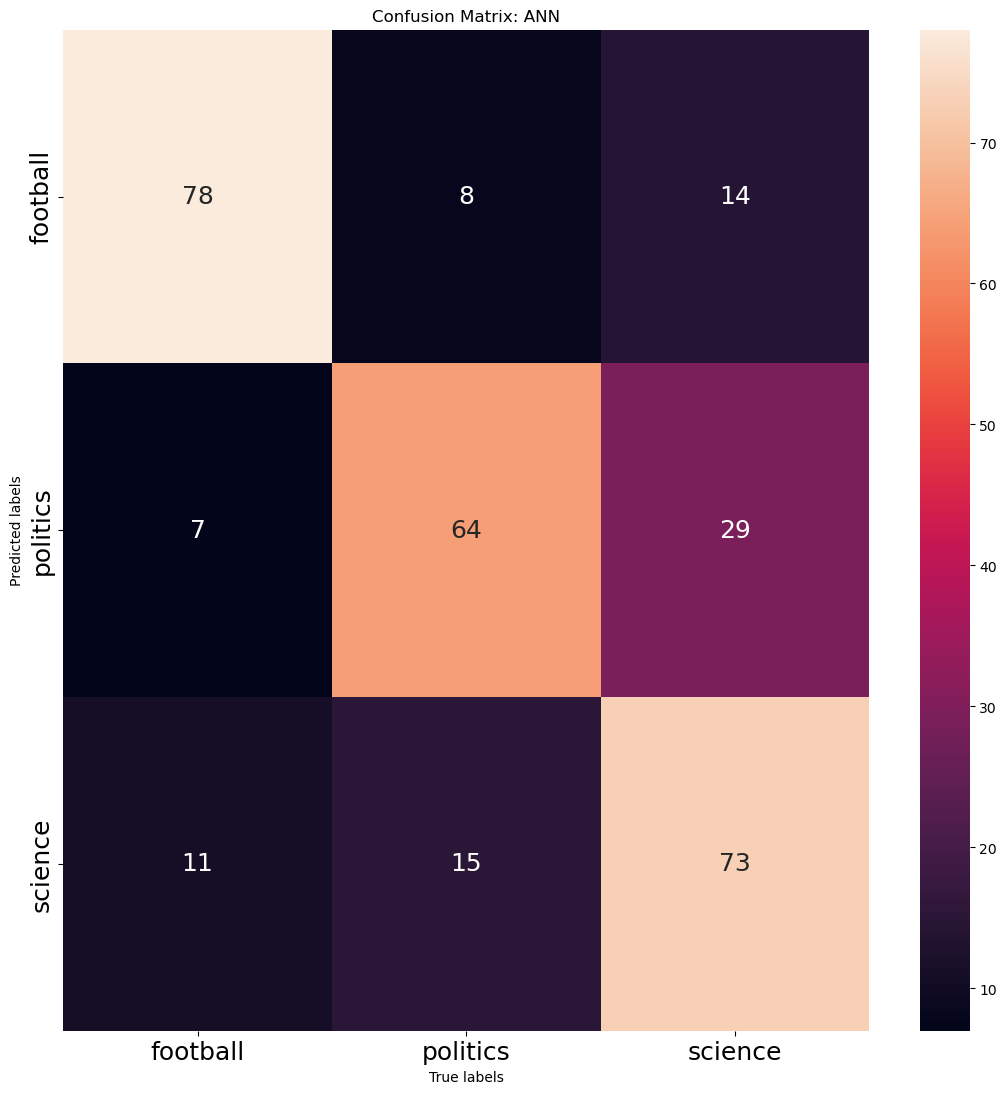

In [67]:
### EVALUATE MODEL
test_loss, test_accuracy = ANN_Model.evaluate(x_test, y_test)

predictions = ANN_Model.predict([x_test])
print("\nThe prediction vector for the first data point in the test data is:\n", predictions[0])
print("\nThe index of the maximum value in the vector gives a predicted label of:", np.argmax(predictions[0]))
print("\nThe actual label in the test set labels is:", y_test[0])

# Get just the numeric label predictions for test data
predicted_labels = to_categorical(np.argmax(predictions, axis=1), 3)

## Pretty Confusion Matrix
labs = list(lab_encoder.categories_[0])
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(cm)

fig, ax = plt.subplots(figsize=(13,13)) 
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})

# labels, title and ticks
ax.set_xlabel('True labels') 
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix: ANN') 
ax.xaxis.set_ticklabels(labs,fontsize = 18)
ax.yaxis.set_ticklabels(labs, fontsize = 18)

# Model 2: CNN


In [68]:
### Convolutional Neural Network

# Takes in non-flattened data: CNN/images need spatial awarness maintained
# {padding="same" & stride=default} -> output is same size as input
CNN_Model = tf.keras.models.Sequential([
    # Conv2D layer - tells model to keep input in 2D (spatial image!)
    ## Initial conv layers observe simplistic features (fewer filters)
    tf.keras.layers.Conv1D(input_shape = (300,1),
                           kernel_size = 3, #
                           filters = 50,
                           activation = 'relu',
                           padding = 'same',
                           ), # default stride = (1,1)
    # Pooling Layers - redice dimensionality/number of parameters
    # makes model less sensitive to minor variations or overfitting
    tf.keras.layers.MaxPooling1D(pool_size=2),

    tf.keras.layers.Conv1D(filters = 45, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling1D(pool_size = 2),

    # After spatial features are extracted: fully connected NN
    # Pass flattened data through fully connected dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation= 'sigmoid'), 
    tf.keras.layers.Dropout(0.2), # Randomly turns 20% of input units to 0 (prevents overfitting)
    tf.keras.layers.Dense(3, activation= 'softmax') # pdf across 3 possible classes
    ])

CNN_Model.summary()


CNN_Model.compile(
    loss = "categorical_crossentropy",
    metrics=["accuracy"],
    optimizer='adam' # robust, applicable to wide range of problems
    )


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 300, 50)           200       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 150, 50)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 148, 45)           6795      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 74, 45)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 3330)              0         
                                                                 
 dense_56 (Dense)            (None, 20)              

Epoch 1/25
6/6 [==============================] - 1s 83ms/step - loss: 1.1653 - accuracy: 0.3533 - val_loss: 1.0818 - val_accuracy: 0.3426
Epoch 2/25
6/6 [==============================] - 0s 12ms/step - loss: 1.0917 - accuracy: 0.3988 - val_loss: 1.0072 - val_accuracy: 0.4429
Epoch 3/25
6/6 [==============================] - 0s 13ms/step - loss: 1.0567 - accuracy: 0.4132 - val_loss: 0.9574 - val_accuracy: 0.5432
Epoch 4/25
6/6 [==============================] - 0s 12ms/step - loss: 0.9929 - accuracy: 0.4922 - val_loss: 0.9118 - val_accuracy: 0.5961
Epoch 5/25
6/6 [==============================] - 0s 12ms/step - loss: 0.9595 - accuracy: 0.5186 - val_loss: 0.8809 - val_accuracy: 0.5905
Epoch 6/25
6/6 [==============================] - 0s 12ms/step - loss: 0.9315 - accuracy: 0.5222 - val_loss: 0.8551 - val_accuracy: 0.5850
Epoch 7/25
6/6 [==============================] - 0s 13ms/step - loss: 0.8978 - accuracy: 0.5641 - val_loss: 0.8311 - val_accuracy: 0.6100
Epoch 8/25
6/6 [===========

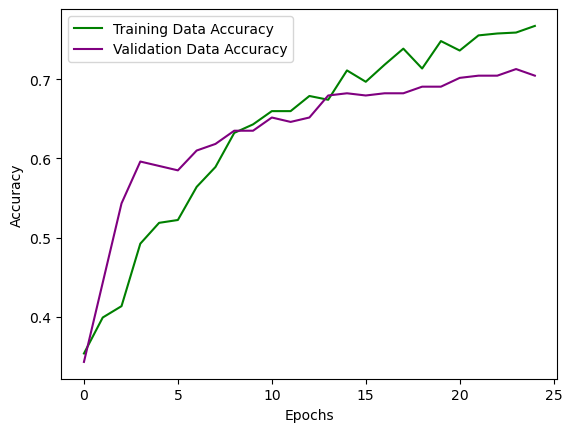

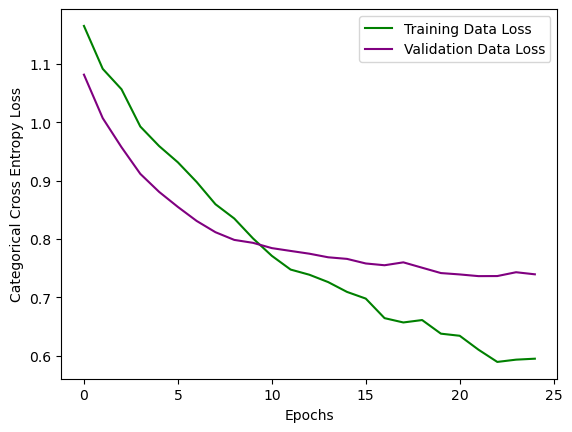

In [69]:
### TRAINING
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=4, verbose=1, mode='max', restore_best_weights=True)

## FIT THE MODEL
model_train = CNN_Model.fit(x_train, y_train,
                        epochs = 25,
                        batch_size = 150,
                        validation_data = (x_valid, y_valid),
                        callbacks = early_stopping)

# Visualize training results
# Plot Accuracy over epochs
plt.figure()
plt.plot(model_train.history['accuracy'], label="Training Data Accuracy", color='green')
plt.plot(model_train.history['val_accuracy'], label="Validation Data Accuracy", color='purple')
plt.ylabel('Accuracy')
plt.xlabel("Epochs")
plt.legend()

# Plot Loss over epochs
plt.figure()
plt.plot(model_train.history['loss'], label="Training Data Loss", color='green')
plt.plot(model_train.history['val_loss'], label="Validation Data Loss", color='purple')
plt.ylabel('Categorical Cross Entropy Loss')
plt.xlabel("Epochs")
plt.legend()

10/10 [==============================] - 0s 1ms/step

The prediction vector for the first data point in the test data is:
 [0.01069046 0.7881085  0.20120099]

The index of the maximum value in the vector gives a predicted label of: 1

The actual label in the test set labels is: [0. 1. 0.]
[[78  6 16]
 [14 54 32]
 [18 20 61]]


[Text(0, 0.5, 'football'), Text(0, 1.5, 'politics'), Text(0, 2.5, 'science')]

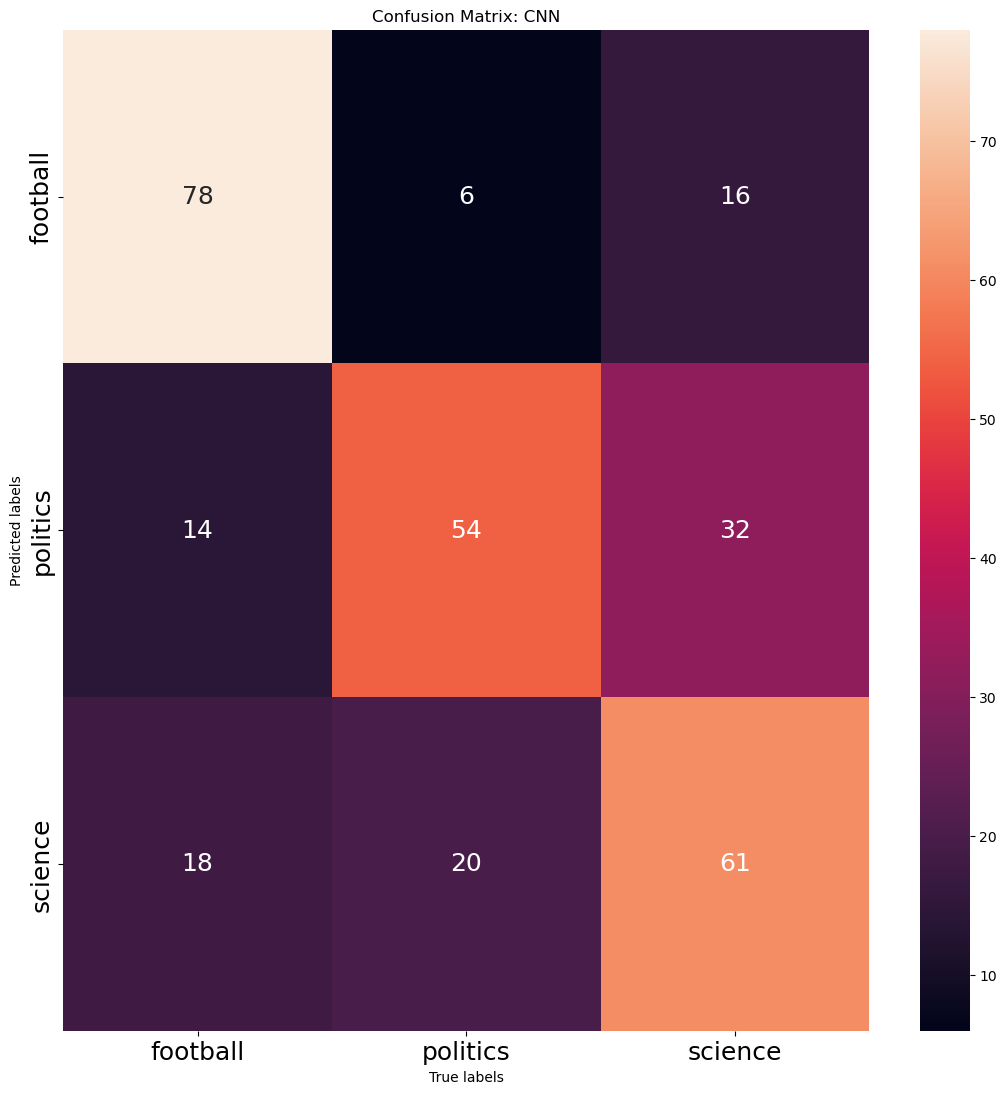

In [94]:
### EVALUATE MODEL
test_loss, test_accuracy = CNN_Model.evaluate(x_test, y_test)

predictions = CNN_Model.predict([x_test])
print("\nThe prediction vector for the first data point in the test data is:\n", predictions[0])
print("\nThe index of the maximum value in the vector gives a predicted label of:", np.argmax(predictions[0]))
print("\nThe actual label in the test set labels is:", y_test[0])

# Get just the numeric label predictions for test data
predicted_labels = to_categorical(np.argmax(predictions, axis=1), 3)

## Pretty Confusion Matrix
labs = list(lab_encoder.categories_[0])
#enc_labels = [[1. 0. 0.], [0. 1. 0.], [0. 0. 1.]]
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(cm)

fig, ax = plt.subplots(figsize=(13,13)) 
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
#annot=True to annotate cells, ftm='g' to disable scientific notation
# annot_kws si size  of font in heatmap
# labels, title and ticks
ax.set_xlabel('True labels') 
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix: CNN') 
ax.xaxis.set_ticklabels(labs,fontsize = 18)
ax.yaxis.set_ticklabels(labs, fontsize = 18)

# Model 3: RNN LSTM

In [40]:
### Recurrent Neural Network with Long Short-Term Memory
LSTM_Model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(20, input_shape=(300,1)),
    tf.keras.layers.Dropout(0.4), # Randomly turns 20% of input units to 0 (prevents overfitting)
    tf.keras.layers.Dense(3, activation= 'softmax')
    ])
    
LSTM_Model.summary()

### Compile and then train model
LSTM_Model.compile(
    loss = "categorical_crossentropy", # allows use of numeric labels (not OneHotEncoded) 
    metrics=["accuracy"],
    optimizer='adam' # robust, applicable to wide range of problems
    )


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 20)                1760      
                                                                 
 dropout_18 (Dropout)        (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 3)                 63        
                                                                 
Total params: 1,823
Trainable params: 1,823
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
5/5 [==============================] - 1s 89ms/step - loss: 1.0980 - accuracy: 0.2970 - val_loss: 1.0979 - val_accuracy: 0.2674
Epoch 2/30
5/5 [==============================] - 0s 52ms/step - loss: 1.0981 - accuracy: 0.3186 - val_loss: 1.0976 - val_accuracy: 0.3092
Epoch 3/30
5/5 [==============================] - 0s 50ms/step - loss: 1.0981 - accuracy: 0.3485 - val_loss: 1.0973 - val_accuracy: 0.3203
Epoch 4/30
5/5 [==============================] - 0s 51ms/step - loss: 1.0981 - accuracy: 0.3437 - val_loss: 1.0970 - val_accuracy: 0.3370
Epoch 5/30
5/5 [==============================] - 0s 50ms/step - loss: 1.0971 - accuracy: 0.3713 - val_loss: 1.0967 - val_accuracy: 0.4262
Epoch 6/30
5/5 [==============================] - 0s 50ms/step - loss: 1.0973 - accuracy: 0.3701 - val_loss: 1.0964 - val_accuracy: 0.4150
Epoch 7/30
5/5 [==============================] - 0s 50ms/step - loss: 1.0968 - accuracy: 0.3749 - val_loss: 1.0962 - val_accuracy: 0.4067
Epoch 8/30
5/5 [===========

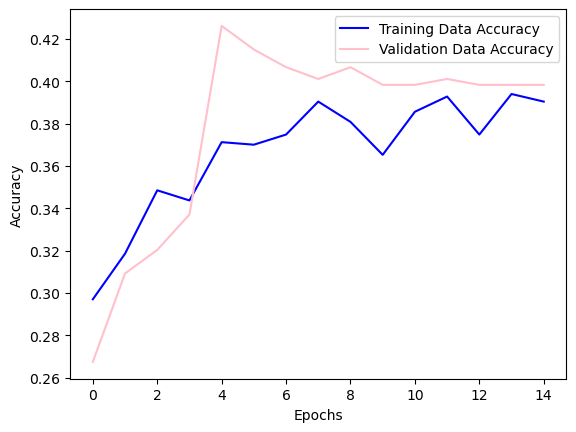

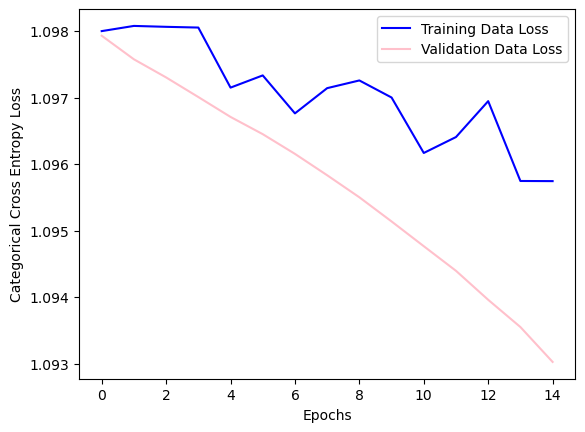

In [41]:
### TRAINING
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=10, verbose=1, mode='max', restore_best_weights=True)

## FIT THE MODEL
model_train = LSTM_Model.fit(x_train, y_train,
                        epochs = 30,
                        batch_size = 200,
                        validation_data = (x_valid, y_valid),
                        callbacks = early_stopping
                            )

# Visualize training results
# Plot Accuracy over epochs
plt.figure()
plt.plot(model_train.history['accuracy'], label="Training Data Accuracy", color='blue')
plt.plot(model_train.history['val_accuracy'], label="Validation Data Accuracy", color='pink')
plt.ylabel('Accuracy')
plt.xlabel("Epochs")
plt.legend()

# Plot Loss over epochs
plt.figure()
plt.plot(model_train.history['loss'], label="Training Data Loss", color='blue')
plt.plot(model_train.history['val_loss'], label="Validation Data Loss", color='pink')
plt.ylabel('Categorical Cross Entropy Loss')
plt.xlabel("Epochs")
plt.legend()

10/10 [==============================] - 0s 6ms/step

The prediction vector for the first data point in the test data is:
 [0.33232513 0.3340605  0.33361438]

The index of the maximum value in the vector gives a predicted label of: 1

The actual label in the test set labels is: [0. 1. 0.]
[[87 11  2]
 [73 21  6]
 [83 13  3]]


[Text(0, 0.5, 'football'), Text(0, 1.5, 'politics'), Text(0, 2.5, 'science')]

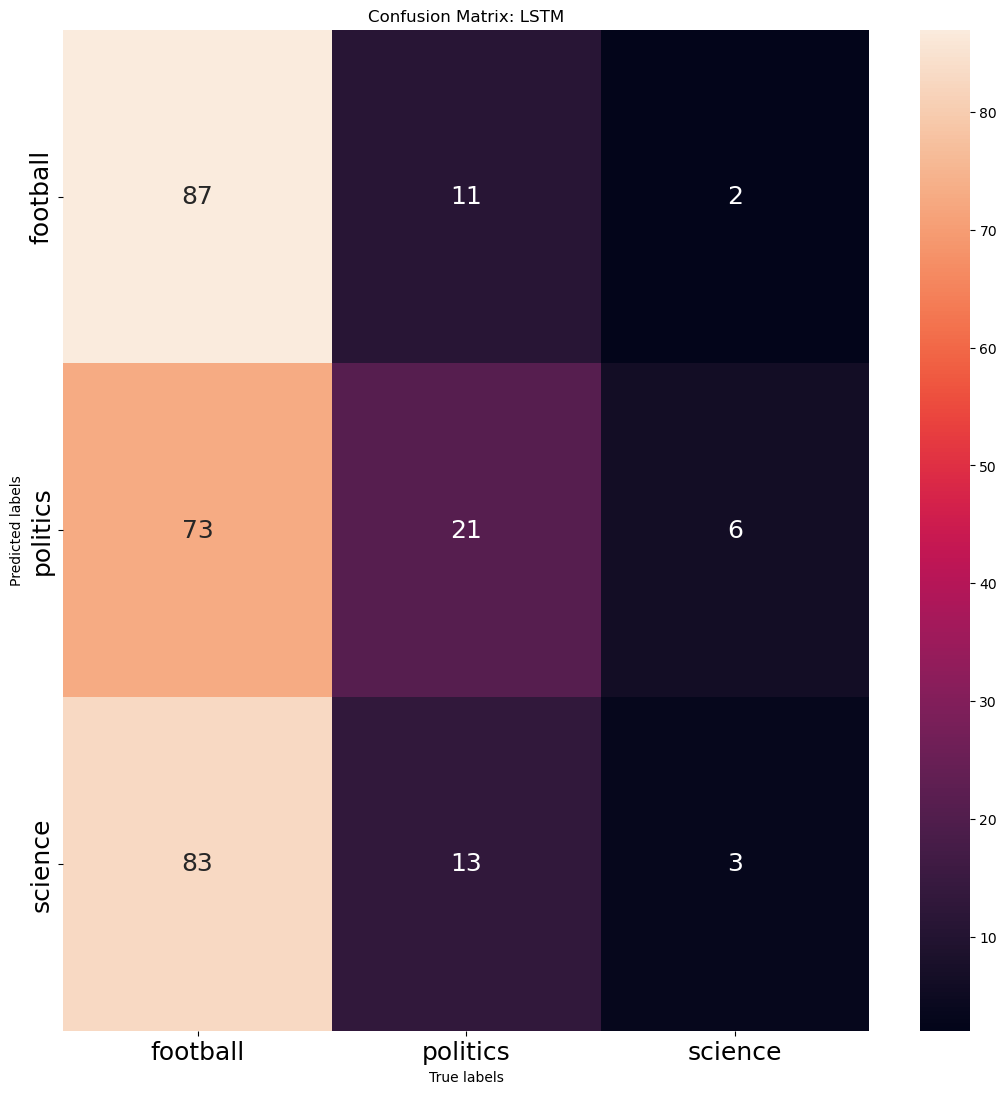

In [95]:
### EVALUATE MODEL
test_loss, test_accuracy = LSTM_Model.evaluate(x_test, y_test)

predictions = LSTM_Model.predict([x_test])
print("\nThe prediction vector for the first data point in the test data is:\n", predictions[0])
print("\nThe index of the maximum value in the vector gives a predicted label of:", np.argmax(predictions[0]))
print("\nThe actual label in the test set labels is:", y_test[0])

# Get just the numeric label predictions for test data
predicted_labels = to_categorical(np.argmax(predictions, axis=1), 3)

## Pretty Confusion Matrix
labs = list(lab_encoder.categories_[0])
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(cm)

fig, ax = plt.subplots(figsize=(13,13)) 
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})

# labels, title and ticks
ax.set_xlabel('True labels') 
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix: LSTM') 
ax.xaxis.set_ticklabels(labs,fontsize = 18)
ax.yaxis.set_ticklabels(labs, fontsize = 18)

# BONUS Model: Naive Bayes Classification

In [89]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Re-combine all data
X_train = np.concatenate([x_train, x_valid, x_test])
Y_train = np.concatenate([labels_train, labels_valid, labels_test])

# Creating and training the Naive Bayes classifier
clf = MultinomialNB()

scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))


Cross-Validation Scores: [0.68227425 0.69899666 0.71906355 0.75167785 0.66442953]
Mean Accuracy: 0.7032883661421743


# BONUS Model: Support Vector Machines

In [92]:
from sklearn.svm import SVC
X_train = np.concatenate([x_train, x_valid])
Y_train = np.concatenate([labels_train, labels_valid])

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the classifier
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(labels_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(labels_test, y_pred))

Accuracy: 0.7357859531772575
Classification Report:
               precision    recall  f1-score   support

    football       0.93      0.76      0.84       100
    politics       0.79      0.59      0.67       100
     science       0.60      0.86      0.71        99

    accuracy                           0.74       299
   macro avg       0.77      0.74      0.74       299
weighted avg       0.77      0.74      0.74       299



[Text(0, 0.5, 'football'), Text(0, 1.5, 'politics'), Text(0, 2.5, 'science')]

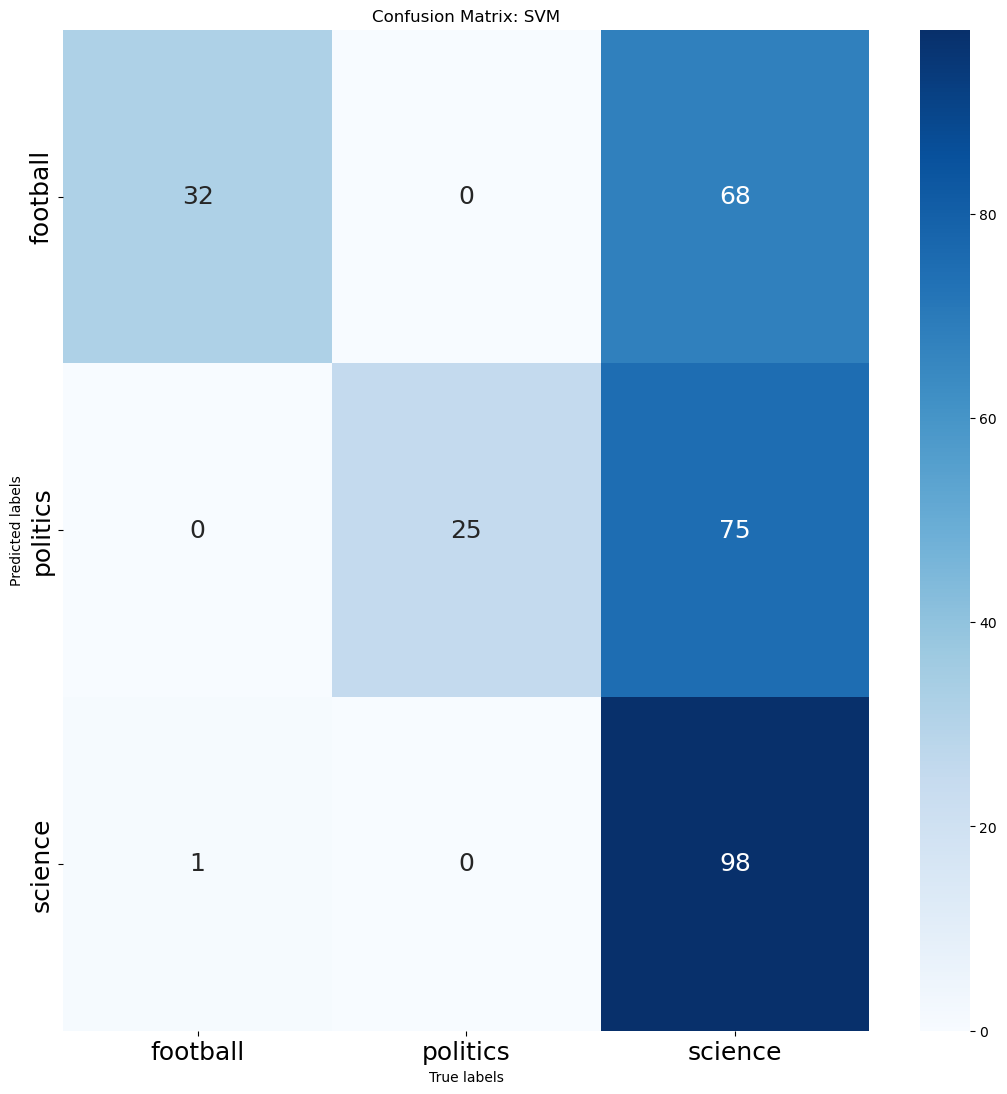

In [103]:
## Pretty Confusion Matrix
labs = list(lab_encoder.categories_[0])
cm = confusion_matrix(labels_test, y_pred)

fig, ax = plt.subplots(figsize=(13,13)) 
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={'size': 18}, cmap="Blues")

# labels, title and ticks
ax.set_xlabel('True labels') 
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix: SVM') 
ax.xaxis.set_ticklabels(labs,fontsize = 18)
ax.yaxis.set_ticklabels(labs, fontsize = 18)

## Data Visualization

0
1
2


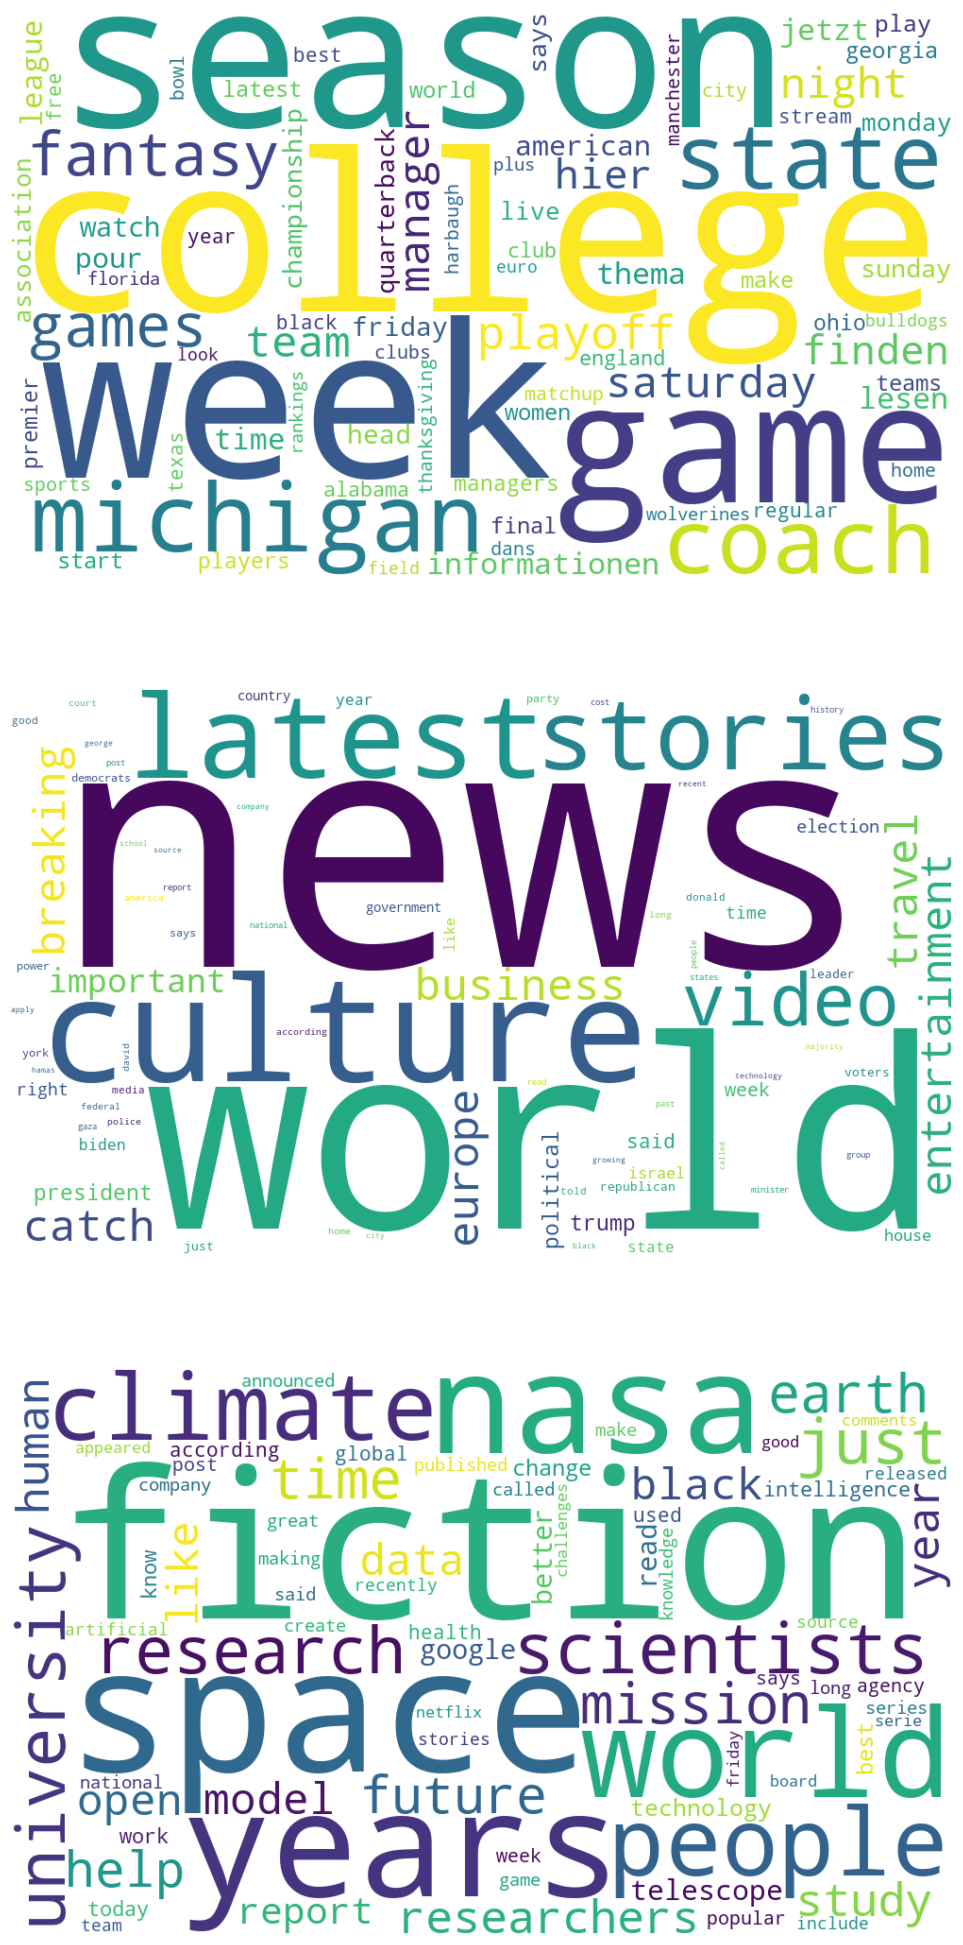

In [105]:
from wordcloud import WordCloud, STOPWORDS
WC_List = []
Name_List = []
topics = list(lab_encoder.categories_[0])

for topic in topics:
    topic_df = Data[Data['LABEL'] == topic]
    
    topic_df =topic_df.sum(axis=0,numeric_only=True)
    NextVarName = str("WordCloud_"+str(topic))
    
    ## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
    
    ## Create and store in a list the wordcloud OBJECTS
    WC = WordCloud(width=1000, height=600, background_color="white",
                   #min_word_length=4, #mask=next_image,
                   max_words=75).generate_from_frequencies(topic_df)
    
    ## Here, this list holds all three wordclouds I am building
    WC_List.append(WC)
    Name_List.append(NextVarName)
    
print(List_of_WC)


# # Create the wordclouds
fig=plt.figure(figsize=(25, 25))
#figure, axes = plt.subplots(nrows=2, ncols=2)
NumTopics=len(topics)
for i in range(NumTopics):
    print(i)
    ax = fig.add_subplot(NumTopics,1,i+1)
    plt.imshow(WC_List[i], interpolation='bilinear')
    plt.axis("off")
    plt.savefig("NewClouds.pdf")

In [106]:
topics

['football', 'politics', 'science']